In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from  matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Red Wine Quality
## Обзор данных

In [2]:
data = pd.read_csv('winequality-red.csv')
features = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Input variables (по результатам физико-химических исследований):
1. `fixed acidity` - фиксированная кислотность, большинство кислот, связанных с вином или фиксированны, или нелетучи (не испаряются легко).
2. `volatile acidity` - изменяемые значения кислотности, количество уксусной кислоты в вине, которое при слишком высоких уровнях может привести к неприятному, уксусному вкусу.
3. `citric acid` - лимонная кислота, найденная в небольших количествах, может добавить "свежесть" и аромат к винам.
4. `residual sugar` - остаточный сахар, количество сахара, оставшегося после остановки брожения, редко можно найти вина с менее чем 1 г/л, и вина с более чем 45 г/л считаются сладкими.
5. `chlorides` - хлориды, это количество соли в вине.
6. `free sulfur dioxide`  - свободный диоксид серы, свободная форма SO2 существует в равновесии между молекулярным SO2 (как растворенный газ) и бисульфит-ионом; предотвращает микробный рост и окисление вина.
7. `total sulfur dioxide` - общий диоксид серы, общее количество диоксида серы свободных и связанных форм S02; в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрации свободного SO2 более 50 ppm SO2 становится очевидным в носу и вкусе вина.
8. `density` - плотность, близка к плотности воды в зависимости от процентного содержания спирта и сахара.
9. `pH` - водородный показатель, по шкале от 0 (очень кислый) до 14( очень щелочной); большинство вин находятся между 3-4 по шкале рН.
10. `sulphates` - содержание сульфатов, добавка, которая может внести вклад в уровни газа двуокиси серы (S02), который действует как противомикробное и противоокислительное
11. `alcohol` - содержание алкоголя, процент содержания алкоголя в вине

### Output variable (по результатам сенсорного анализа): 
12. `quality`  оценка вина по десятибалльной шкале на основе сенсорного анализа

## Основные статистические характеристики признаков
* `mean` - **выборочное (эмпирическое) среднее** — это приближение теоретического среднего распределения, основанное на выборке из него.
$${\bar  {X}}={\frac  {1}{n}}\sum \limits _{{i=1}}^{n}X_{i}.$$
* `std` - **cреднеквадратическое отклонение** (среднее квадратическое отклонение, среднеквадратичное отклонение, квадратичное отклонение, стандартное отклонение, стандартный разброс) — наиболее распространённый показатель рассеивания значений случайной величины относительно её математического ожидания. Среднеквадратическое отклонение определяется как квадратный корень из дисперсии случайной величины: ${\displaystyle \sigma ={\sqrt {D[X]}}}.$ Оценка стандартного отклонения на основании смещённой оценки дисперсии (иногда называемой просто выборочной дисперсией): $${\displaystyle S={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}}$$ Оценка стандартного отклонения на основании несмещённой оценки дисперсии (подправленной выборочной дисперсии, в ГОСТ Р 8.736-2011 — «среднее квадратическое отклонение»): $${\displaystyle S_{0}={\sqrt {{\frac {n}{n-1}}S^{2}}}={\sqrt {{\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}.}$$
* `quantile(p)` - **квантиль**  — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. **p-м процентилем** называют квантиль уровня ${\displaystyle \alpha =p/100}$. Соответственно, медиана является 50-м процентилем, а первый и третий квартиль — 25-м и 75-м процентилями соответственно. Процентили также называются перцентилями или центилями.
* `min`, `max` - соответствено **минимальное** и **максимальное** значения в выборке.

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Графическое представление распределний
Проведем анализ распределений по следующим графическим представлениям:
* **Ящик с усами, диаграмма размаха** — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей. Границами ящика служат первый и третий квартили, линия в середине ящика — медиана. Концы усов — края статистически значимой выборки (без выбросов), они определяются по формулам:
$${\displaystyle X_{1}=Q_{1}-k(Q_{3}-Q_{1})},   {\displaystyle X_{2}=Q_{3}+k(Q_{3}-Q_{1})},$$
где $X_{1}$ — нижняя граница уса, $X_{2}$ — верхняя граница уса, $Q_1$ — первый квартиль, $Q_{3}$ — третий квартиль, $k$ — коэффициент, наиболее часто равен 1,5.
* **Плотность вероятности** — один из способов задания распределения случайной величин; вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной (переменных).
* **Гистограмма** в математической статистике — это функция, приближающая плотность вероятности некоторого распределения, построенная на основе выборки из него.

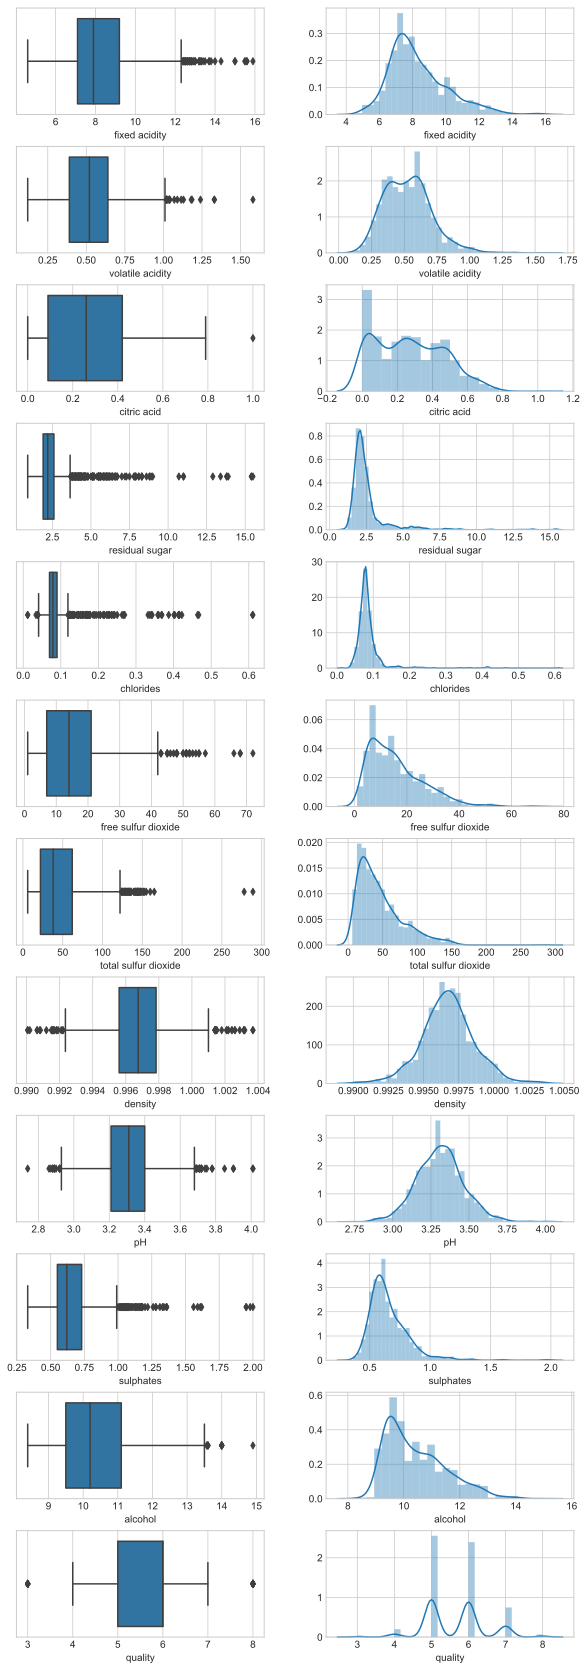

In [5]:
rcParams['figure.subplot.wspace'] = 0.25
rcParams['figure.subplot.hspace'] = 0.3

fig, axs = plt.subplots(data.shape[1], 2, figsize=(10,30))

for i,feature in enumerate(data.columns):
    sns.boxplot(data[feature], ax=axs[i,0])
    sns.distplot(data[feature], ax=axs[i,1])

plt.show()

Анализ графиков показывает, что плотность распределния для признаков `pH` и `density` похожа на  **нормальное распределение**. Некоторые другие признаки, например, `fixed acidity`, `residual sugar` и подобные имеют распредеелние похожее на **логнормальное**.

**Нормальное распределение** (распределение Гаусса) задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:

$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}},}$$
где параметр $μ$ — математическое ожидание (среднее значение), медиана и мода распределения, а параметр $σ$ — среднеквадратическое отклонение (σ ² — дисперсия) распределения.

Выполним оценку параметров теоретического нормального распределения по выборкам `pH` и `density` ($μ$ = `mean`, $σ$ = `std`) и сопоставим полученную кривую с гистограммой.

In [6]:
def compare_norm(sample):
    '''
    Аналитический расчет функции плотности нормального распределения с параметрами, оценеными 
    на выборке sample. Отображение гистограммы выборки sample и расчитанной кривой функции плотности.
    '''
    mu = sample.mean()
    std = sample.std()
    
    x = np.linspace(stats.norm.ppf(0.001, loc=mu, scale=std), 
                    stats.norm.ppf(0.999, loc=mu, scale=std), 
                    300)
    
    p = stats.norm(loc=mu, scale=std).pdf(x)
    
    plt.title(f'Плотность вероятности {sample.name}')
    sns.distplot(sample, label = 'data')
    plt.plot(x, p, c='r', label = f'normal,\nmu={mu.round(3)}\nstd={std.round(3)}')
    plt.legend()

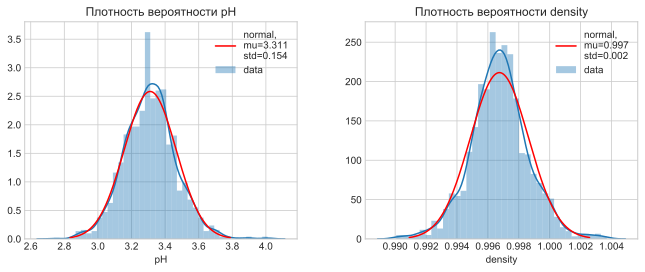

In [7]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
compare_norm(data['pH'])

plt.subplot(1, 2, 2)
compare_norm(data['density'])

plt.show()

Из графиков видно, что распределение выборок признаков достаточно хорошо согласуется с теоретической кривой нормального распределения. Наиболее хорошо это заметно у признака `pH`. На обоих графиках прослеживается, что верхушка пика у теоретической кривой имеет меньшее значение, чем у эмпирической. Удаление из выборки выбросов может уменьшить эту разницу.

In [8]:
def whiskers(sample):
    """
    Расчет значений 'усов' boxplot для выборки sample
    """
    Q1 = sample.quantile(0.25)
    Q3 = sample.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

def clean_sample(sample):
    """
    Очистка выборки sample от выбросов.
    Возвращает выборку sample без выбросов.
    """
    left, right = whiskers(sample)
    return sample[(sample > left) & (sample < right)]

def clean_mask(sample):
    """
    Маска для выбросов в выборке sample
    """
    left, right = whiskers(sample)
    return (sample > left) & (sample < right)

Удалено выбросов из pH: 35 шт. (2.19%)
Удалено выбросов из density: 45 шт. (2.81%)


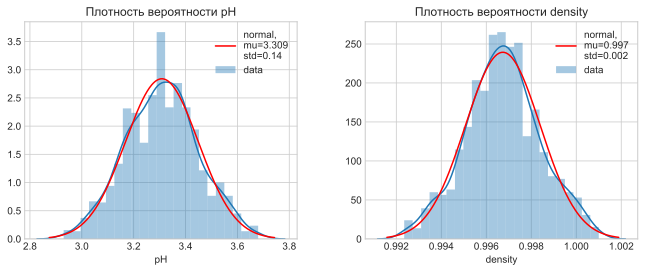

In [9]:
clean_pH = clean_sample(data['pH'])
clean_density = clean_sample(data['density'])

plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
compare_norm(clean_pH)

plt.subplot(1, 2, 2)
compare_norm(clean_density)

_ph_count = data["pH"].size - clean_pH.size  # Удалено выбросов из pH
_dens_count = data["density"].size - clean_density.size  # Удалено выбросов из density
_ph_proc = round(100 - (clean_pH.size*100/data["pH"].size),2)  # Удалено выбросов из pH в %
_dens_proc = round(100 - (clean_density.size*100/data["density"].size),2)  # Удалено выбросов из density в %

print(f'Удалено выбросов из pH: {_ph_count} шт. ({_ph_proc}%)')
print(f'Удалено выбросов из density: {_dens_count} шт. ({_dens_proc}%)')
      
plt.show()

После очистки выбросов данные стали еще лучше соответствовать теоретическому распределению.

Если случайная величина имеет **логнормальное распределение**, то её логарифм имеет нормальное распределение. Пусть распределение случайной величины ${X}$ задаётся плотностью вероятности, имеющей вид:

$${f_{X}(x)={\frac {1}{x\sigma {\sqrt {2\pi }}}}e^{-(\ln x-\mu )^{2}/2\sigma ^{2}},}$$

где ${ x>0,\;\sigma >0,\;\mu \in \mathbb {R}}$. Тогда говорят, что ${X}$ имеет логнормальное распределение с параметрами ${\mu}$  и ${\sigma }$.

Выполним оценку параметров теоретического нормального распределения по выборкам `fixed acidity` и `residual sugar` с прологарифмированными значениями и сопоставим полученную кривую с гистограммой. Используя полученные параметры, сопостаим теоретическую кривую плотности логнормалного распределения с исходными диаграммами признаков.

In [10]:
def compare_logn_norm(sample):
    '''
    Аналитический расчет функции плотности логнормального распределения с параметрами, оценеными 
    на пролагорифмированной выборке sample. Отображение гистограммы выборки sample и расчитанной 
    кривой   функции   плотности   логнормального    распределения.    Отображение   гистограммы 
    прологарифмированной выборки sample  и  расчитанной  кривой  функции  плотности  нормального 
    распределения.
    '''
    normal = np.log(sample)
    mu = normal.mean()
    sigma = normal.std()
    
    x = np.linspace(stats.lognorm.ppf(0.001, sigma, scale=np.exp(mu)), 
                    stats.lognorm.ppf(0.999, sigma, scale=np.exp(mu)), 
                    300)
    p = stats.lognorm(sigma, scale=np.exp(mu)).pdf(x)    
    
    plt.figure(figsize=(10,3))
    
    plt.subplot(1, 2, 1)    
    plt.title(f'Плотность вероятности {sample.name}')
    sns.distplot(sample,label = 'data')
    plt.plot(x, p, c='r', label = 'lognormal')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    compare_norm(normal)
    plt.title(f'Плотность вероятности\n ln({sample.name})')
    plt.xlabel(f'ln({sample.name})')

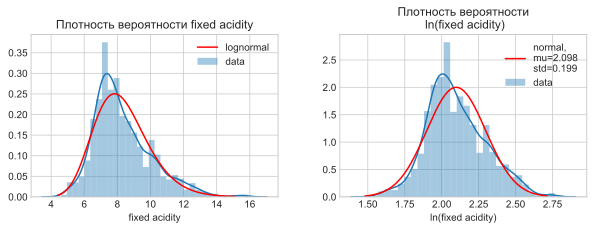

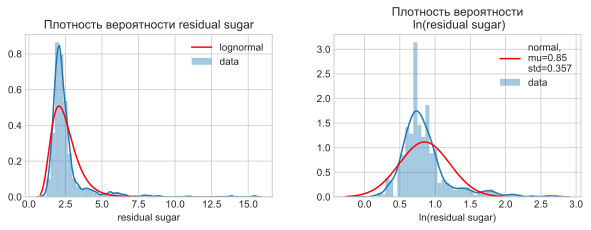

In [11]:
compare_logn_norm(data['fixed acidity'])
compare_logn_norm(data['residual sugar'])
plt.show()

Видно, что теоретическая кривая плохо сопоставляется с данными, особено для признака `residual sugar`. Попробуем очистить данные от выбросов, путем удаления из выборки элементов, значения которых превышают некоторый порог.

Удалено выбросов из fixed acidity: 138 шт. (8.63)%
Удалено выбросов из residual sugar: 101 шт. (6.32)%


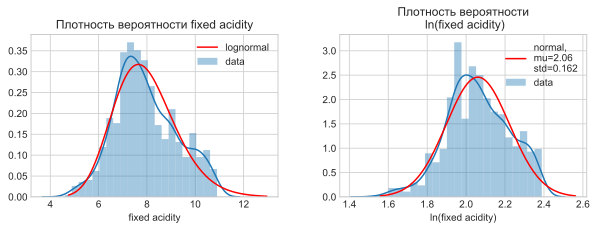

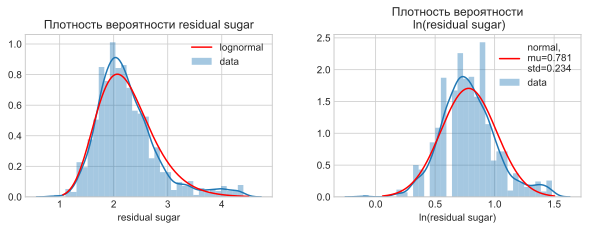

In [12]:
FA_TRESHOLD = 11
clean_fa = data['fixed acidity'][data['fixed acidity'] < FA_TRESHOLD]
compare_logn_norm(clean_fa)

RS_TRESHOLD = 4.5
clean_rs = data['residual sugar'][data['residual sugar'] < RS_TRESHOLD]
compare_logn_norm(clean_rs)

# подсчет удаленных выбросов и их процент от выборки 
_fa_count = data["fixed acidity"].size - clean_fa.size  
_rs_count = data["residual sugar"].size - clean_rs.size
_fa_proc = round(100 - (clean_fa.size*100/data["fixed acidity"].size),2)
_rs_proc = round(100 - (clean_rs.size*100/data["residual sugar"].size),2)

print(f'Удалено выбросов из fixed acidity: {_fa_count} шт. ({_fa_proc})%')
print(f'Удалено выбросов из residual sugar: {_rs_count} шт. ({_rs_proc})%')

Хоть очистка выбросов и привела данные к более хорошему соответствию теоретическому распределению, разница остается достаточно заметна.

## Проверка признаков на нормальность
Для проверки распределения на нормальность воспользуемся __критерием Колмогорова-Смирнова__. Результат теста `pvalue` показывает максимальный уровень значимотси, при котором гипотезу о нормальном распределнии можно принять.

In [13]:
def kstest(sample):
    '''
    Тест Колмогорова-Смирнова для проверки на нормальность выборки sample
    '''
    cdf = stats.norm(loc=sample.mean(), scale=sample.std(ddof=1)).cdf
    return stats.kstest(rvs=sample, cdf=cdf)

In [14]:
print('pH')
print('Исходная выборка, p_value:', kstest(data['pH'])[1])
print('Очищенная выборка, p_value:', kstest(clean_pH)[1])
print('')
print('density')
print('Исходная выборка, p_value:', kstest(data['density'])[1])
print('Очищенная выборка, p_value:', kstest(clean_density)[1])
print('')
print('ln(fixed acidity)')
print('Исходная выборка, p_value:', kstest(np.log(data['fixed acidity']))[1])
print('Очищенная выборка, p_value:', kstest(np.log(clean_fa))[1])
print('')
print('ln(residual sugar)')
print('Исходная выборка, p_value:', kstest(np.log(data['residual sugar']))[1])
print('Очищенная выборка, p_value:', kstest(np.log(clean_rs))[1])

pH
Исходная выборка, p_value: 0.010604884802448568
Очищенная выборка, p_value: 0.3222535534311902

density
Исходная выборка, p_value: 0.0031716414529832353
Очищенная выборка, p_value: 0.16257053526109472

ln(fixed acidity)
Исходная выборка, p_value: 4.397390651020322e-08
Очищенная выборка, p_value: 0.00492953882020393

ln(residual sugar)
Исходная выборка, p_value: 3.3145001010118793e-37
Очищенная выборка, p_value: 3.183560151852002e-08


Наилучшее результат теста наблюдается у признака `pH`. Предположение о соответствии признака `fixed acidity` логнормальному распределнию допустимо лишь для очищенной от выбросов выборке с уровнем значимости не более 0.5%. Распредеелние `residual sugar` с большой увереностью не является логнормальным.

## Доверительный интервал мат.ожидания `pH`

Так как допускаем, что `pH` имеет нормальное распределение, а дисперсия не известна, то доверительный интервал для математического ожидания можно построить с помощью t-распределения. Используется статистика:
$$T(X) = \dfrac{\overline{X} - a}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения. В предположении, что гипотеза $H_0$ верна, статистика $T$ имеет __t-распределение Стьюдента $t(n - 1)$__.

Доверительный интервал:
$$
P \left( 
    \overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
    \leq a \leq
    \overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{\sigma_X}{\sqrt{n}} 
\right) = p.
$$

In [15]:
def expval_interval(sample, p):
    '''
    Расчитывает доверительный интервал мат.ожидания для выборки sample с уровем надежности p.
    Возвращает кортеж (левая граница, правая граница)
    '''
    n = sample.shape[0]
    mean = sample.mean()
    std = sample.std(ddof=1)
    alpha = 1 - p
    t = stats.t.ppf(1 - alpha / 2, df=n - 1)
    return (mean - t * std / np.sqrt(n), mean + t * std / np.sqrt(n))

expval_interval(data['pH'], 0.95)

(3.303540297040475, 3.3186860944542085)

__Доверительный интервал мат.ожидания `pH` с надежностью 95%:__    $(3.3035, 3.3187)$

## Корреляционный анализ

Коэффициент корреляции Пирсона позволяет определить, какова теснота (или сила) корреляционной связи между двумя показателями, измеренными в количественной шкале.
$$\mathbf {r} _{XY}={\frac {\mathbf {cov} _{XY}}{\mathbf {\sigma } _{X}{\sigma }_{Y}}}={\frac {\sum (X-{\bar {X}})(Y-{\bar {Y}})}{\sqrt {\sum (X-{\bar {X}})^{2}\sum (Y-{\bar {Y}})^{2}}}}.$$

Проанализируем матрицу коэффициентов корреляции Пирсона для датасета:

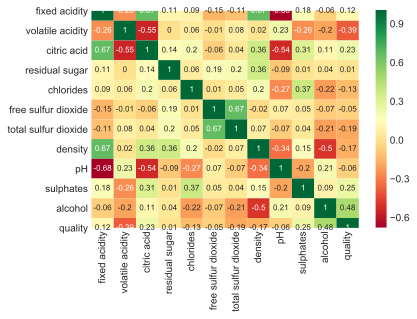

In [16]:
sns.heatmap(data=data.corr().round(2),annot=True,cmap='RdYlGn',annot_kws={'size': 8})
plt.show()

Теснота связи выше среднего наблюдается у следующих пар признаков:
* `fixed acidity` и `pH` : -0,68
* `fixed acidity` и `density` : 0.67
* `fixed acidity` и `citric acid` : 0.67
* `free sulfur dioxide` и `total sulfur dioxide` : 0.67
* `pH` и `citric acid` : -0.54
* `alcohol` и `density` : -0.5

Взаимосвязи

* `fixed acidity`, `citric acid`, `pH` скорее всего обусловлены общим химическим свойством - кислотность.
* `alcohol` и `fixed acidity` имеют плотность отличную от воды, поэтому различное количество их содержания в вине влияют на `density`
* `free sulfur dioxide` и `total sulfur dioxide` скорее всего связаны тем, что отражают количественную характеристику одного и того же вещества в разных состояниях.

Высокая корреляция (`fixed acidity, pH`) и (`fixed acidity, density`) скорее всего обусловлена еще тем, что эти распределения этих признаков наиболее приближены к нормальному.

Как было показано выше `fixed acidity` имеет логнормальное распределение, поэтому пролагорифмированные значения этого признака должны показать более высокий коэффициент корреляции.

In [17]:
print('fixed acidity и pH:    ', np.corrcoef(data['fixed acidity'],data['pH'])[0,1])
print('ln(fixed acidity) и pH:', np.corrcoef(np.log(data['fixed acidity']),data['pH'])[0,1])
print()
print('fixed acidity и density:    ', np.corrcoef(data['fixed acidity'],data['density'])[0,1])
print('ln(fixed acidity) и density:', np.corrcoef(np.log(data['fixed acidity']),data['density'])[0,1])

fixed acidity и pH:     -0.6829781945685311
ln(fixed acidity) и pH: -0.7063602002358982

fixed acidity и density:     0.6680472921189736
ln(fixed acidity) и density: 0.6747700861037683


## Парная регрессия

__Парная регрессия__ — частный случай линейной регрессии, когда рассматривается только один признак (т.е. $k = 1$).

Построим модели парной регрессии для следующих пар признаков:

* `fixed acidity` и `pH`
* `ln(fixed acidity)` и `pH`
* `fixed acidity` и `density`
* `ln(fixed acidity)` и `density`

Сначала проанализируем графики наблюдений для рассматриваемых пар признаков. На графиках каждая точка - наблюдение, координаты точек - значения признаков для этого наблюдения.

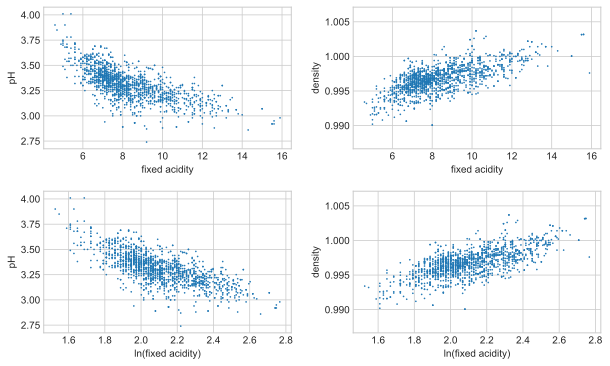

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.scatter(data['fixed acidity'],data['pH'],s=0.5)
plt.xlabel('fixed acidity')
plt.ylabel('pH')

plt.subplot(2,2,3)
plt.scatter(np.log(data['fixed acidity']),data['pH'],s=0.5)
plt.xlabel('ln(fixed acidity)')
plt.ylabel('pH')

plt.subplot(2,2,2)
plt.scatter(data['fixed acidity'],data['density'],s=0.5)
plt.xlabel('fixed acidity')
plt.ylabel('density')

plt.subplot(2,2,4)
plt.scatter(np.log(data['fixed acidity']),data['density'],s=0.5)
plt.xlabel('ln(fixed acidity)')
plt.ylabel('density')


plt.show()

На графиках заметна линейная взаимосвязь признаков, причем для `pH` она отрицательна, а для `density` положительна. Это подтверждается рассмотренными выше коэффициентами корреляции для расмотреных пар признаков

Для парной регрессии коэффициенты вычисляются по формулам:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2} = \frac{\operatorname{cov}{(x,y)}}{{D(x)}}, \:\:
b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ — выборочное среднее.

In [19]:
class SimpleLinearRegression():
    '''
    Модель парной регрессии.
    '''
    def fit(self,x,y):
        '''
        Обучение модели по наблюдениям признаков x и целевой переменной y.
        '''
        # b1 = ((x * y).mean() - y.mean() * x.mean()) / ((x ** 2).mean() - x.mean() ** 2)        
        self.b1 = np.cov(x,y)[1,0]/np.var(x,ddof=1)
        self.b0 = y.mean() - self.b1 * x.mean()
    
    def predict(self, x):
        '''
        Предсказание целевой переменной по наблюденям x.
        Возвращает целевую переменную.
        '''
        return self.b0 + self.b1 * np.array(x)

Построим модели для предсказания признака `pH` и `density` по признаку `fixed acidity` (исходный и log), и отобразим полученные коэффициенты.

In [20]:
slr_models = [SimpleLinearRegression() for _ in range(4)]
fa_ph, fa_dens, lnfa_ph, lnfa_dens = slr_models

fa_ph.fit(data['fixed acidity'], data['pH'])
pH_fa_pred = fa_ph.predict(data['fixed acidity'])

fa_dens.fit(data['fixed acidity'], data['density'])
density_fa_pred = fa_dens.predict(data['fixed acidity'])

lnfa_ph.fit(np.log(data['fixed acidity']), data['pH'])
pH_lnfa_pred = lnfa_ph.predict(np.log(data['fixed acidity']))

lnfa_dens.fit(np.log(data['fixed acidity']), data['density'])
density_lnfa_pred = lnfa_dens.predict(np.log(data['fixed acidity']))

for target, predictor, model in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), slr_models):
    print('tagret:',target,'\tpredictor:',predictor,'\tb0 =', model.b0.round(3), '\tb1 =', model.b1.round(3))

tagret: ph      	predictor: fa     	b0 = 3.815 	b1 = -0.061
tagret: density 	predictor: fa     	b0 = 0.991 	b1 = 0.001
tagret: ph      	predictor: ln(fa) 	b0 = 4.459 	b1 = -0.547
tagret: density 	predictor: ln(fa) 	b0 = 0.983 	b1 = 0.006


Видно, что коэффициент $b_1$ для `pH` отрицателен, что соответствует обратной линейной зависимости.

Проверим коэффициенты наших моделей с помощью встроенной функции парной регрессии `scipy.stats.linregress`.

In [21]:
scipy_models = [
    stats.linregress(data['fixed acidity'], data['pH']),
    stats.linregress(data['fixed acidity'], data['density']),
    stats.linregress(np.log(data['fixed acidity']), data['pH']),
    stats.linregress(np.log(data['fixed acidity']), data['density'])
]

for target, predictor, model in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), scipy_models):
    print('tagret:',target,'\tpredictor:',predictor,'\tb0 =', model[1].round(3), '\tb1 =', model[0].round(3))

tagret: ph      	predictor: fa     	b0 = 3.815 	b1 = -0.061
tagret: density 	predictor: fa     	b0 = 0.991 	b1 = 0.001
tagret: ph      	predictor: ln(fa) 	b0 = 4.459 	b1 = -0.547
tagret: density 	predictor: ln(fa) 	b0 = 0.983 	b1 = 0.006


Коэффициенты равны, наши модели верны.

Построим полученные линии регрессии на графиках наблюдений.

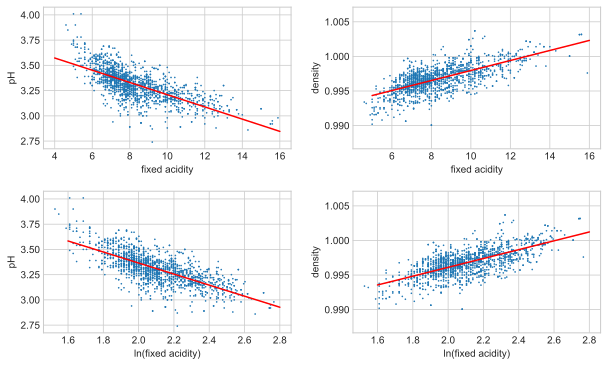

In [22]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.scatter(data['fixed acidity'],data['pH'],s=0.5)
plt.plot([4,16], fa_ph.predict([4,16]), c='r')
plt.xlabel('fixed acidity')
plt.ylabel('pH')

plt.subplot(2,2,3)
plt.scatter(np.log(data['fixed acidity']),data['pH'],s=0.5)
plt.plot([1.6,2.8], lnfa_ph.predict([1.6,2.8]), c='r')

plt.xlabel('ln(fixed acidity)')
plt.ylabel('pH')

plt.subplot(2,2,2)
plt.scatter(data['fixed acidity'],data['density'],s=0.5)
plt.plot([5,16], fa_dens.predict([5,16]), c='r')

plt.xlabel('fixed acidity')
plt.ylabel('density')

plt.subplot(2,2,4)
plt.scatter(np.log(data['fixed acidity']),data['density'],s=0.5)
plt.plot([1.6,2.8], lnfa_dens.predict([1.6,2.8]), c='r')

plt.xlabel('ln(fixed acidity)')
plt.ylabel('density')

plt.show()

По графикам видно, что линии регрессии хорошо соответствуют данным.

## Линейная регрессия

Построим модель линейной регресси, которая будет предсказывать `pH` по признакам `densty` и прологарифмированному `fixed acidity`, с помощью __метода наименьших квадратов__.

In [23]:
X = data[['density','fixed acidity']]
X['fixed acidity'] = np.log(X['fixed acidity'])
X = X.values
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = data['pH'].values.reshape(-1,1)

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [24]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

315.02728458700795

Опеределитель не близок к нулю, поэтому используем аналитическое решение.

In [25]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y)

for i,coef in enumerate(b):
    print(f'b{i} = {coef}')

b0 = [-15.468088]
b1 = [20.26412294]
b2 = [-0.67628372]


где 
* $b_0$ - свободный член, 
* $b_1$ - коэффициент признака `density`, 
* $b_2$ - коэффициент признака `ln(fixed acidity)`.

Предскажем значения `pH` по расчитанной модели. 

In [26]:
ph_predict = X.dot(b).flatten()

Сверим наши расчеты с моделью из библиотеки `scikit-learn`.

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X[:,1:], y)
ph_predict_sklearn = lr.predict(X[:,1:])

print('b0 =', lr.intercept_)
print('b1 =', lr.coef_.T[0])
print('b1 =', lr.coef_.T[1])

b0 = [-15.468088]
b1 = [20.26412295]
b1 = [-0.67628372]


Коэффициенты практически равны, наша модель верна.

## Оценка качества моделей линейной регрессии
__Коэффициент детерминации__:
$$R^2 = \dfrac{D_{model}}{D_y},$$
где $D_y$ — выборочная дисперсия по массиву реальных значений $y$, а $D_{model}$ — выборочная дисперсия по массиву предсказанных значений.

Коэффициент детерминации можно также посчитать как квадрат коэффициента корреляции между объясняемой переменной и предсказанной переменной $z$:
$$R^2 = r_{yz}^2.$$

В случае парной регрессии это значение сводится к корреляции между переменными $x$ и $y$, поскольку переменная $z$ линейной выражается через $x$.
$$R^2 = r_{xy}^2$$

Другим удобным способом оценки качества модели является __средняя ошибка аппроксимации__. Она вычисляется по формуле:
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

Оценим модели парной регрессии:

In [28]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

def r2_score(y_real, y_pred):
    return y_pred.var()/y_real.var()


r2_slr = [
    np.corrcoef(data['pH'],data['fixed acidity'])[1,0]**2,
    np.corrcoef(data['density'],data['fixed acidity'])[1,0]**2,
    np.corrcoef(data['pH'],np.log(data['fixed acidity']))[1,0]**2,
    np.corrcoef(data['density'],np.log(data['fixed acidity']))[1,0]**2
]

maes = [
    mean_approximation_error(data['pH'],pH_fa_pred),
    mean_approximation_error(data['density'],density_fa_pred),
    mean_approximation_error(data['pH'],pH_lnfa_pred),
    mean_approximation_error(data['density'],density_lnfa_pred)
]

for target, predictor, r2, mae in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), r2_slr, maes):
    print('tagret:',target,'\tpredictor:',predictor,'\tR2 =', r2.round(5),'\tMAE =', (mae*100).round(5), '%')

tagret: ph      	predictor: fa     	R2 = 0.46646 	MAE = 2.57908 %
tagret: density 	predictor: fa     	R2 = 0.44629 	MAE = 0.10766 %
tagret: ph      	predictor: ln(fa) 	R2 = 0.49894 	MAE = 2.50406 %
tagret: density 	predictor: ln(fa) 	R2 = 0.45531 	MAE = 0.1065 %


* $\overline{A}$ не превышает $8$-$10 \%$ для всех моделей, значит теоретические значения близки к тем, которые выдают модели.
* логарифмирование признака `fixed acidity` увеличивает точность модели (так как этот признак распределен логнормально)
* Точность моделей  для `pH` по $R^2$ выше, а по средней ошибке апроксимации ниже, чем для `density`.

Оценим модель линейной регрессии с двумя признаками:

In [29]:
print('R2 =', r2_score(data['pH'],ph_predict))
print('MAE =', (mean_approximation_error(data['pH'],ph_predict)*100).round(5))

R2 = 0.5320374814647287
MAE = 2.43357


Добваление в модель линейной регрессии признака `density` в дополнение к `ln(fixed acidity)` повысило точность предсказания `pH` и снизило среднюю ошибку аппроксимации.

## Оценка значимости уравнений линейной регрессии

Используем __F-критерий Фишера__. В этом случае нулевая гипотеза состоит в том, что все коэффициенты регрессии равны нулю. Соответствующая статистика равна
$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$
где
* $R^2$ — коэффициент детерминации, 
* $n$ — число наблюдений, 
* $k$ — число факторов. 


Критическое значение $F_{сrit} = F(k_1, k_2)$ определим с помощью функции `scipy.stats.f.ppf`, где $k_1 = k$, $k_2 = n - k - 1$.

Если $T > F_{crit}$, то нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

Для моделей парной регрессии надежностью 95%:

In [30]:
k1 = 1
k2 = data.shape[0] - k1 - 1
r2_scores = np.array(r2_slr)
alpha = 0.05

T = (k2/k1) * r2_scores / (1-r2_scores)

F_crit = stats.f.ppf(1 - alpha, k1, k2)

for target, predictor, _T in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), T):
    print('tagret:',target,'\tpredictor:',predictor,'\tT =', _T.round(2), '\tF_crit =', F_crit.round(2))

tagret: ph      	predictor: fa     	T = 1396.21 	F_crit = 3.85
tagret: density 	predictor: fa     	T = 1287.17 	F_crit = 3.85
tagret: ph      	predictor: ln(fa) 	T = 1590.27 	F_crit = 3.85
tagret: density 	predictor: ln(fa) 	T = 1334.97 	F_crit = 3.85


Для всех моделей парной регрессии $T > F_{crit}$, значит уравнения регрессии во всех моедлях __статистически значимы__.

Определим для этих моделей доверительные интервалы коэффициентов уравнения регрессии с помощью __t-статистики Стьюдента__.

__стандартная ошибка коэффициента наклона__.
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$
где:
* $x$, $x_i$ — соответственно, все значения и конкретное значение фактора
* $y_i$ — конкретное значение оцениваемой (целевой) переменной
* $z_i$ — «предсказанное» значение, полученное с помощью модели регрессии
* $n$ — число элементов в выборке

$$P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$$

__Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [31]:
def s_slope(x, y, z, n):
    return np.sqrt((((y - z) ** 2).sum() / (n - 2)) / ((x - x.mean()) ** 2).sum())

n = data.shape[0]
fa_ph_s_slope = s_slope(data['fixed acidity'],data['pH'], pH_fa_pred, n)
fa_dens_s_slope = s_slope(data['fixed acidity'], data['density'], density_fa_pred, n)
lnfa_ph_s_slope = s_slope(np.log(data['fixed acidity']), data['pH'], pH_lnfa_pred, n)
lnfa_dens_s_slope = s_slope(np.log(data['fixed acidity']), data['density'], density_lnfa_pred, n)

s_slopes = np.array([fa_ph_s_slope, fa_dens_s_slope, lnfa_ph_s_slope, lnfa_dens_s_slope])

t = stats.t.ppf(1 - alpha / 2, df=n-2)

Доверительные интервалы для параметра $b_1$:

In [32]:
def b1_int(b1, t, S_slope):
    return np.array([b1 - t * S_slope, b1 + t * S_slope]).T

b1_s = np.array([model.b1 for model in slr_models])
b1_ints = b1_int(b1_s, t, s_slopes)

for targ, pred, model, inter in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), slr_models, b1_ints):
    print('tagret:',targ,'\tpredictor:',pred,'\tb1 =', model.b1.round(5), '\tinterval =', inter.round(5))

tagret: ph      	predictor: fa     	b1 = -0.06056 	interval = [-0.06374 -0.05738]
tagret: density 	predictor: fa     	b1 = 0.00072 	interval = [0.00068 0.00076]
tagret: ph      	predictor: ln(fa) 	b1 = -0.54687 	interval = [-0.57377 -0.51997]
tagret: density 	predictor: ln(fa) 	b1 = 0.00639 	interval = [0.00604 0.00673]


Все коэффийиенты $b_1$ попадают в доверительные интервалы

Аналогично для параметра $b_0$:

In [33]:
def s_intercept(S_slope, x):
    return S_slope * np.sqrt((x ** 2).mean())

xs = np.array([data['fixed acidity'],
               data['fixed acidity'],
               np.log(data['fixed acidity']),
               np.log(data['fixed acidity'])])

s_inrercepts = s_intercept(s_slopes, xs)

Доверительный интервал для параметра $b_0$:

In [34]:
def b0_int(b0, t, S_inrercept):
    return np.array([b0 - t * S_inrercept, b0 + t * S_inrercept]).T

b0_s = np.array([model.b0 for model in slr_models])
b0_ints = b0_int(b0_s,t,s_inrercepts)

for targ, pred, model, inter in zip(('ph     ', 'density')*2, ('fa    ','fa    ','ln(fa)','ln(fa)'), slr_models, b0_ints):
    print('tagret:',targ,'\tpredictor:',pred,'\tb1 =', model.b0.round(5), '\tinterval =', inter.round(5))

tagret: ph      	predictor: fa     	b1 = 3.81496 	interval = [3.79527 3.83464]
tagret: density 	predictor: fa     	b1 = 0.99072 	interval = [0.99048 0.99097]
tagret: ph      	predictor: ln(fa) 	b1 = 4.45857 	interval = [4.29201 4.62513]
tagret: density 	predictor: ln(fa) 	b1 = 0.98335 	interval = [0.98122 0.98547]


Все коэффийиенты $b_0$ попадают в доверительные интервалы

# Классификация с помощью логистической регрессии
__На базе данных о физико-химических исследованиях построим различные модели классификации качества вин и сравним их.__ 

Проанализируем распределение частот оценок `quality`.

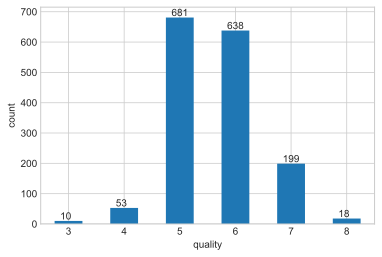

In [35]:
target = 'quality'

def category_bar(sample):
    samp = sample.astype('category').copy()
    sorted_samp = samp.value_counts().sort_index()
    
    bar_samp = sorted_samp.plot(kind='bar')
    plt.xticks(rotation=0)
    plt.xlabel(sample.name)
    plt.ylabel('count')
    
    # отображение анотаций столбцов диагарммы
    for i, patch in enumerate(bar_samp.patches):
        bar_samp.text(patch.get_x()+0.1, patch.get_height()+5, sorted_samp.values[i])
        
category_bar(data[target])
plt.show()

Около 80% оценок - это "5" и "6". 

Целесообразно разделить вина на две категории:
* __0__ - Плохие (`bad`)
* __1__ - Хорошие (`good`)

Определим в качестве порогового значения, относительно которого будем разделять вина на категории качества, среднюю оценку по всей выборке признака `quality`. В качестве влияющих определим все остальные признаки (`Input variables`)

In [36]:
threshold = data[target].mean()

X = data.drop(target, axis=1)

y = data[target].copy()
y[y <= threshold] = 0
y[y >  threshold] = 1
y = y.astype("category")

y.value_counts()

1    855
0    744
Name: quality, dtype: int64

За счет симметричности распределения частот оценок относительно среднего значения новая выборка категорий достаточно сбалансирована, это позволит построить хорошие модели классификации.

Разделим наши данные на тренировочные и тестовые.

In [37]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Обучим модель логистической регрессии из библиотеки `scikit-learn` на тренировочных данных

In [38]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver="liblinear")
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Используя обученную модель, предскажем качество вин на тренировочных и на тестовых данных.

In [39]:
y_train_pred = logr.predict(X_train)
y_test_pred = logr.predict(X_test)

## Метрики качества классификационной модели
### Метрика `accuracy` (точность)
Равна отношению числа объектов, на которых целевой класс был угадан верно, к общему числу объектов

In [40]:
from sklearn.metrics import accuracy_score
print('TRAIN accuracy_score:', accuracy_score(y_train, y_train_pred))
print('TEST  accuracy_score:',  accuracy_score(y_test, y_test_pred))

TRAIN accuracy_score: 0.7419859265050821
TEST  accuracy_score: 0.753125


Метрика `accuracy` очень плохо работает в случае несбалансированной выборки. Наша выборка достаточно хорошо сбалансирована, поэтому полученные оценки `accuracy`  правильно отражают точность, полученная модель логистической регрессии достаточно хорошо справляется с классификацией вин по качеству, правильно определяя   качество вина с вероятностью около 76%.

Однако рассмотрим другие метрики качества.

### `Confusion matrix` (матрица ошибок)

Данная матрица содержит в себе 4 значения:

* __True Negative (TN)__ - случаи, когда плохое вино правильно классифицировано как плохое вино (объект класса 0).
* __False Positive (FP)__ - случаи, когда вино классифицировано как хорошее (объект класса 1), а на самом деле плохое.
* __False Negative (FN)__ - случаи, когда вино классифицировано как плохое, а на самом деле хорошее.
* __True Positive (TP)__ - случаи, когда хорошее вино правильно классифицировано как хорошее вино.

$$confusion\_matrix = \begin{bmatrix} {TN}& {FP}\\ {FN}& {TP}\end{bmatrix}$$

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(cm)

[[113  41]
 [ 38 128]]


### Метрика `precision` (точность)

Является долей хороших вин (объектов класса 1), верно классифицированных моделью, к общему числу вин, которые модель классифицировала как хорошие (объекты класса 1). $$precision = \dfrac{TP}{TP + FP}.$$

In [42]:
TP / (TP + FP)

0.757396449704142

In [43]:
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)

0.757396449704142

### Метрика `recall` (полнота)
Является долей найденных моделью хороших вин (объектов класса 1): $$recall = \dfrac{TP}{TP + FN}.$$

In [44]:
TP / (TP + FN)

0.7710843373493976

In [45]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)

0.7710843373493976

### $F_1$-мера

Хорошим способом комбинировать эти две метрики является мера $F_1$:

$$F_1 = 2 \cdot \dfrac{precision \cdot recall}{precision + recall}.$$

In [46]:
2*(TP / (TP + FP))*(TP / (TP + FN))/((TP / (TP + FP))+(TP / (TP + FN)))

0.764179104477612

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred)

0.764179104477612

## AUC

Следующей часто используемой метрикой является метрика _AUC_ или _Area Under Curve_ (площадь под кривой). Часто в качестве кривой используется кривая ___ROC___. 

Нужно получить не просто метки класса для каждого классифицируемого объекта, а вероятности принадлежности к классу 1. Это можно сделать с помощью метода `.predict_proba`. Данный метод возвращает для каждого классифицируемого объекта список из двух значений. Первой идёт вероятность принадлежности классу 0, а второй - вероятность принадлежности классу 1.

In [48]:
y_train_pred_proba = logr.predict_proba(X_train)
y_test_pred_proba = logr.predict_proba(X_test)
y_test_pred_proba[:3]

array([[0.53719519, 0.46280481],
       [0.65165   , 0.34835   ],
       [0.14840603, 0.85159397]])

Левое число определеяет вероятность, что вино плохое, а правое, что вино хорошее.

Используя расчитанные вероятности, построим гистограммы плотностей вероятности на объектах  класса 0 и на объектах класса 1.

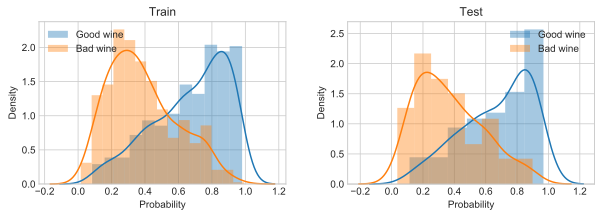

In [49]:
def plot_hist_pred_proba(a_train, a_train_pred_proba, a_test, a_test_pred_proba):
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.distplot(a_train_pred_proba[a_train == 1,1],  label='Good wine')
    sns.distplot(a_train_pred_proba[a_train == 0,1],  label='Bad wine')
    plt.xlabel("Probability")
    plt.ylabel("Density")
    plt.title("Train")
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.distplot(a_test_pred_proba[a_test == 1,1],  label='Good wine')
    sns.distplot(a_test_pred_proba[a_test == 0,1],  label='Bad wine')
    plt.xlabel("Probability")
    plt.ylabel("Density")
    plt.title("Test")
    plt.legend()
    
plot_hist_pred_proba(y_train, y_train_pred_proba, y_test, y_test_pred_proba)
plt.show()

На рисунках видно, что модель способна разделять данные на классы.

Для построения ROC-кривой понадобятся следующие значения:

* $FPR = \dfrac{FP}{FP + TN}$ - False Positive Rate, т.е. доля False Positive

* $TPR = \dfrac{TP}{TP + FN}$ - True Positive Rate, т.е. доля True Positive (совпадает с recall)

__Идея ROC-кривой состоит в следующем.__ Если у нас есть массив с вероятностями принадлежности объектов классу 1, то порог, по которому принимается решение, мы можем выбирать сами. Каждому такому выбору порога соответствуют свои значения FPR и TPR.

Итак, будем постепенно уменьшать порог, начиная с 1, и смотреть, в какие моменты значения FPR и TPR меняются. Как только какое-нибудь из этих значений изменилось, мы будем сохранять текущее значение FPR, TPR, а также значение порога, на котором произошло изменение. Именно эти значения и возвращает функция `roc_curve`.

Необходимые значения расчитываются с помощью функции `roc_curve` из модуля `sklearn.metrics`. Параметр `pos_label` - метка того класса, который мы считаем позитивным. В нашем случае это класс 1.

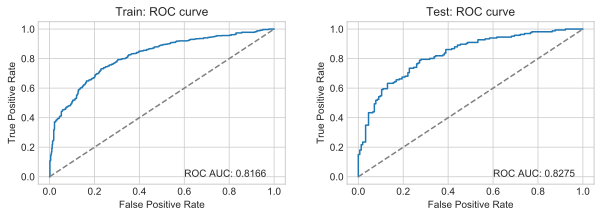

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc(a_train, a_train_pred_proba, a_test, a_test_pred_proba):
    
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    fpr, tpr, thresholds = roc_curve(a_train, a_train_pred_proba[:,1], pos_label=1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Train: ROC curve')
    plt.text(0.6, 0, f'ROC AUC: {round(roc_auc_score(a_train, a_train_pred_proba[:,1]),4)}')
    
    plt.subplot(1,2,2)
    fpr, tpr, thresholds = roc_curve(a_test, a_test_pred_proba[:,1], pos_label=1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Test: ROC curve')
    plt.text(0.6, 0, f'ROC AUC: {round(roc_auc_score(a_test, a_test_pred_proba[:,1]),4)}')

plot_roc(y_train, y_train_pred_proba, y_test, y_test_pred_proba)
plt.show()

Соответственно, метрика ROC AUC - это площадь под кривой ROC. Для константного классификатора эта метрика равна $0.5$, поэтому для хороших классификаторов она должна быть между $0.5$ и $1$.

Сведем все оценки классификационной модели в сравнительную таблицу.

In [51]:
def df_metrics(a_train, a_train_pred, a_test, a_test_pred, a_train_pred_proba, a_test_pred_proba):
    cols = ['score', 'train', 'test']
    vals = []
    
    vals.append('accuracy')
    vals.append(accuracy_score(a_train, a_train_pred))
    vals.append(accuracy_score(a_test, a_test_pred))
    
    cm_train = confusion_matrix(a_train, a_train_pred)
    TN_train = cm_train[0, 0]
    FP_train = cm_train[0, 1]
    FN_train = cm_train[1, 0]
    TP_train = cm_train[1, 1]    
    
    cm_test = confusion_matrix(a_test, a_test_pred)
    TN_test = cm_test[0, 0]
    FP_test = cm_test[0, 1]
    FN_test = cm_test[1, 0]
    TP_test = cm_test[1, 1]
    
    vals.append('true_negative')
    vals.append(TN_train)
    vals.append(TN_test)
        
    vals.append('false_positive')
    vals.append(FP_train)
    vals.append(FP_test)
    
    vals.append('false_negative')
    vals.append(FN_train)
    vals.append(FN_test)
    
    vals.append('true_positive')
    vals.append(TP_train)
    vals.append(TP_test)    
    
    vals.append('precision')
    vals.append(precision_score(a_train, a_train_pred))
    vals.append(precision_score(a_test, a_test_pred))
    
    vals.append('recall')
    vals.append(recall_score(a_train, a_train_pred))
    vals.append(recall_score(a_test, a_test_pred))

    vals.append('F-мера')
    vals.append(f1_score(a_train, a_train_pred))
    vals.append(f1_score(a_test, a_test_pred))
    
    vals.append('ROC_AUC')
    vals.append(roc_auc_score(a_train, a_train_pred_proba[:,1]))
    vals.append(roc_auc_score(a_test, a_test_pred_proba[:,1]))
    
    vals = np.array(vals).reshape((-1,3))
    df = pd.DataFrame(vals, columns=cols)
    return df

    
df_metrics(y_train, y_train_pred, y_test, y_test_pred, y_train_pred_proba, y_test_pred_proba)

,score,train,test
0,accuracy,0.7419859265050821,0.753125
1,true_negative,427,113
2,false_positive,163,41
3,false_negative,167,38
4,true_positive,522,128
5,precision,0.762043795620438,0.757396449704142
6,recall,0.7576197387518142,0.7710843373493976
7,F-мера,0.7598253275109171,0.764179104477612
8,ROC_AUC,0.8166342771395537,0.8274917853231107


Проанализируем коэффициенты регрессии нашей классификационной модели, и выясним, какие признаки вносят наибольший вклад. Для этого необходимо __стандартизировать__ обучающую выборку и снова обучить на ней модель логистической регрессии.

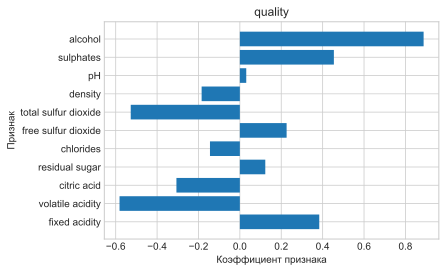

Признаки по убыванию важности:
           feature_names  logr_coef
0                alcohol   0.887909
1       volatile acidity  -0.581421
2   total sulfur dioxide  -0.527325
3              sulphates   0.454285
4          fixed acidity   0.383648
5            citric acid  -0.306533
6    free sulfur dioxide   0.225926
7                density  -0.184731
8              chlorides  -0.144417
9         residual sugar   0.122876
10                    pH  0.0308821


In [52]:
from sklearn.preprocessing import StandardScaler

feature_names = X.columns[:]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

logr_scaled = LogisticRegression(solver="liblinear")
logr_scaled.fit(X_train_scaled, y_train)

logr_intercept = logr_scaled.intercept_  # свободный член
logr_coef = logr_scaled.coef_.flatten()

plt.barh(feature_names, logr_coef)
plt.title(target)
plt.xlabel("Коэффициент признака")
plt.ylabel("Признак")
plt.show()


_arr = np.vstack((feature_names, logr_coef, abs(logr_coef))).T
_rating = pd.DataFrame(_arr, columns=['feature_names', 'logr_coef', 'abs'])
_rating.sort_values(by=['abs'], ascending=False, inplace=True)
_rating.reset_index(drop=True, inplace=True)
_rating.drop('abs', axis=1, inplace=True)
                 
print('Признаки по убыванию важности:')
print(_rating)


Анализ важности признаков показывает:
* высокое содержание алкоголя положительно сказывается на качестве вина;
* высокое содержание `volatile acidity` (летучая кислотность) отрицательно сказывается на качестве вина
* высокое содержание `total sulfur dioxide` (общий диоксид серы) отрицательно сказывается на качестве вина
* и т.д.

Справочно:

* _Летучая кислотность изменяемые значения кислотности, количество уксусной кислоты в вине, которое при слишком высоких уровнях может привести к неприятному, уксусному вкусу. Летучая кислотность (volatile acidity или, сокращенно, VA), как и следует из названия – это та часть кислот в вине, которую можно уловить носом. В отличие от тех кислот, которые ощутимы на вкус. Основные виновники — уксусная кислота (пахнет уксусом) и её эфир – этилацетат (пахнет лаком для ногтей). В малых дозах летучая кислотность придает вину пикантность, но при превышении разумного порога теряется баланс вина и уксусно-лаковая составляющая забивает полезные ароматы и вкусы._
 
*  _Общий диоксид серы, общее количество диоксида серы свободных и связанных форм S02; в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрации свободного SO2 более 50 ppm SO2 становится очевидным в носу и вкусе вина. Виноделы используют диоксид серы в качестве консерванта, сохраняющего вино от окисления. Практически его добавляют в качестве стабилизатора в небольших количествах во все вина. Однако при технологических нарушениях избыток этого вещества приводит к появлению в вине запаха жженых спичек, жженой резины, вареной капусты и даже сероводорода — протухших яиц._

## Дисперсионный анализ

__Дисперсионный анализ__ — метод в математической статистике, направленный на поиск зависимостей в данных, в которых целевая переменная является *абсолютной* ( *количественной* ), а факторы являются *номинативными* ( *категориальными* ).

В __однофакторном дисперсионном анализе__ на одну переменную $Y$ влияет один фактор, наблюдаемый на $k$ *уровнях*, т.е. имеем $k$ выборок для переменной $Y$. Проверяется гипотеза $H_0$ о равенстве средних значений по каждой выборке:
$$H_0: \: \overline{y_1} = \dots = \overline{y_k}.$$

Наблюдаемые данные обозначим $y_{ij}$, где $i$ — индекс уровня ($i = 1, 2, \dots, k$), $j$ — индекс наблюдения на $i$-м уровне ($j = 1, 2, \dots, n_i$). Здесь $n_i$ — число наблюдений на $i$-м уровне. Таким образом, 
$$y_i = \{ y_{i1}, \dots, y_{i n_i} \}$$
для $i = 1, 2, \dots, k$. Соответственно, $\overline{y_i}$ — среднее значение на выборке $y_i$. Обозначим через $n$ общее число наблюдений:
$$n = \displaystyle\sum_{j=1}^{k} n_i.$$

Среднее от всей выборки:
$$\overline{y} = \dfrac{1}{n} \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} y_{ij}.$$

Сумма квадратов отклонений наблюдений от общего среднего:
$$S^2 = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{j=1}^{n_i} ({y}_{ij} - \overline{y})^2.$$

Эту сумму можно разбить на сумму квадратов отклонений средних групповых значений от общего среднего значения $\overline{y}$:
$$S_F^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i$$
и остаточную сумму квадратов отклонений:
$$S_{res}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2.$$

Для этих значений должно быть справедливо равенство
$$S^2 = S_F^2 + S_{res}^2.$$

По этим значениям можно вычислить соответствующие несмещённые оценки дисперсий:
$$\sigma_F^2 = \dfrac{S_F^2}{k - 1}, \: \sigma_{res}^2 = \dfrac{S_{res}^2}{n - k}.$$

Для проверки гипотезы $H_0$ запишем статистику
$$T = \dfrac{\sigma_F^2}{\sigma_{res}^2}.$$

В предположении верности гипотезы $H_0$ статистика $T$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Для выбранного уровня значимости $\alpha$ можно рассчитать критическое значение $F_{crit}$, равное квантилю порядка $1 - \alpha$ для распределения $F(k_1, k_2)$. Если $T > F_{crit}$, то гипотеза $H_0$ отвергается.

**Проверим с помощью однофактороного дисперсионного анализа, влияет ли оценка вина (плохое или хорошее) на количество алкоголя в вине.**

Разделим все значения `alcohol` на две выборки, на которые влияет фактор `quality`, наблюдаемый на двух уровнях.

In [53]:
bad_alco = data['alcohol'][y==0]
good_alco = data['alcohol'][y==1]

n1 = bad_alco.size 
n2 = good_alco.size

n1, n2, n1+n2 == data.shape[0]

(744, 855, True)

In [54]:
bad_alco_mean = bad_alco.mean()
good_alco_mean = good_alco.mean()

bad_alco_mean, good_alco_mean

(9.926478494623655, 10.85502923976608)

In [55]:
alco_mean = data['alcohol'].mean()
alco_mean

10.422983114446529

Найдём значения $S_F^2$ и $S_{res}^2$:

In [56]:
S2_F = n1 * (bad_alco_mean - alco_mean) ** 2 + n2 * (good_alco_mean - alco_mean) ** 2

S2_res = ((bad_alco - bad_alco_mean) ** 2).sum() + ((good_alco - good_alco_mean) ** 2).sum()

S2_F+ S2_res

1814.7645372107568

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [57]:
((data['alcohol'] - alco_mean) ** 2).sum()

1814.764537210757

Расчитаем оценки дисперсий:

In [58]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(343.0061226191699, 0.9215769659308621)

Значение статистики $T$:

In [59]:
T = sigma2_F / sigma2_res
T

372.1947653853391

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [60]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.8472882467544105

In [61]:
T > F_crit

True

Видим, что $T > F_{crit}$, поэтому заключаем, что различие значений алкоголя в плохих и хороших винах является статистически значимым.